In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re


df_raw = pd.read_csv('Orders.csv')
df_raw.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [53]:
# df_raw['Sales'] = df_raw['Sales'].apply(lambda x: float(''.join(re.findall('[.+-]?[0-9]+', x))))
# df_raw['Profit'] = df_raw['Profit'].apply(lambda x: float(''.join(re.findall('[+.-]?[0-9]+', x))))

df_raw['Sales'] = df_raw['Sales'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
df_raw['Profit'] = df_raw['Profit'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

# df_raw.Sales.head()
# df_raw.Profit.head()

# df_raw['Profit'][1]#.split('$')

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

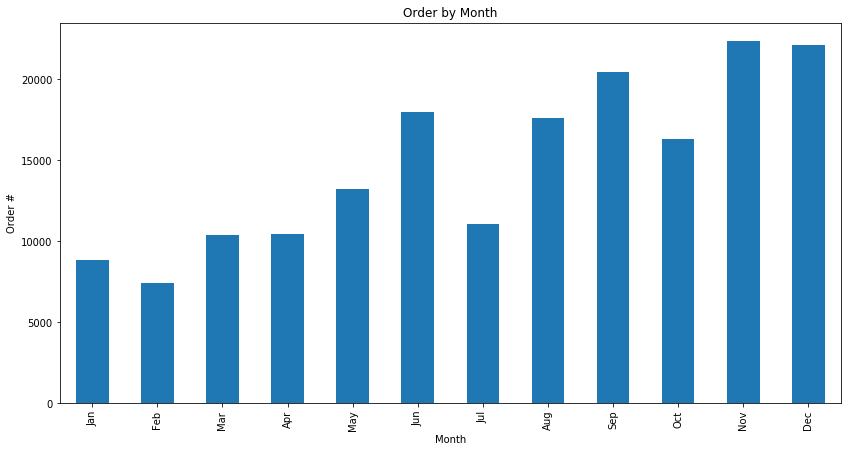

In [156]:
# df_raw['Order.ID'].unique()
df_raw.filter(df_raw['Order.ID'] == 'IN-2014-JR162107-41675')

df_raw['Order.Date'] = pd.to_datetime(df_raw['Order.Date'])
df_raw['Month'] = df_raw['Order.Date'].map(lambda d: d.month)
df_raw['Year'] = df_raw['Order.Date'].map(lambda d: d.year)

plt.figure(figsize=(14, 7))
fig = df_raw.groupby('Month')['Quantity'].sum().plot.bar(x = 'Month', y = 'Quantity')
plt.xlabel('Month')
plt.ylabel('Order #')
plt.title('Order by Month')
fig.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

Text(0.5, 1.0, 'Avg Discount Rate by Month')

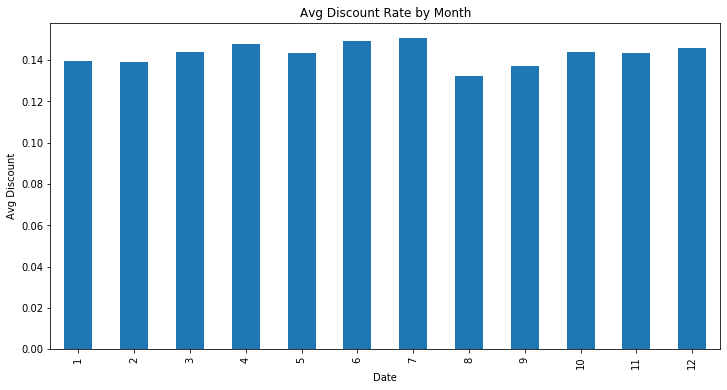

In [155]:
plt.figure(figsize=(12,6))
fig = df_raw.groupby('Month')['Discount'].mean().plot.bar(x = 'Month', y = 'Discount')
plt.xlabel('Date')
plt.ylabel('Avg Discount')
plt.title('Avg Discount Rate by Month')
# fig.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [116]:
df_raw.Category.unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

<Figure size 1008x504 with 0 Axes>

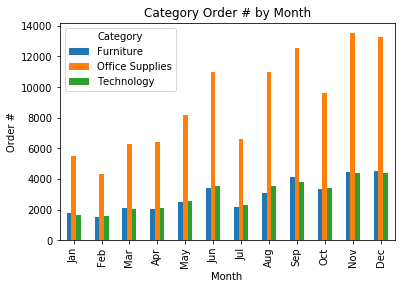

In [160]:
plt.figure(figsize=(14,7))

fig2 = df_raw.groupby(['Month', 'Category'])['Quantity'].sum().sort_values(ascending = True).unstack().plot.bar()
plt.xlabel('Month')
plt.ylabel('Order #')
plt.title('Category Order # by Month')
fig2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.


	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

Text(0.5, 1.0, 'Profit Loss Due to Returns by Year')

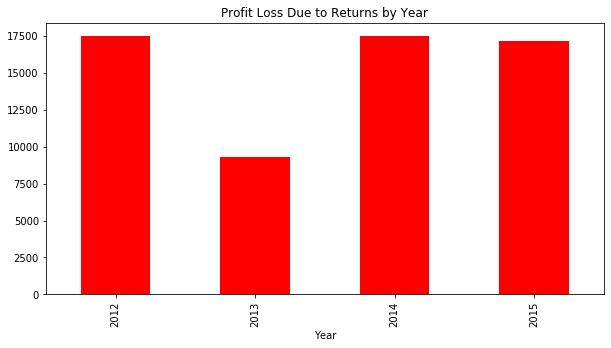

In [171]:
# 1
df_raw.describe()
df_return = pd.read_csv('Returns.csv')
df_return = df_return.rename(columns = {'Order ID': 'Order.ID'})

plt.figure(figsize=(10,5))

# adding info from the Orders file to the Returns file
df_return = pd.merge(df_raw, df_return, how = 'inner', on = 'Order.ID')
df_return.head()
df_return.groupby('Year')['Profit'].sum().plot.bar(color = 'r')
plt.title('Profit Loss Due to Returns by Year')

In [177]:
df_return.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,Returned,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1715.16,2,0.0,720.36,725.57,Critical,12,2012,Yes,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2197.50,5,0.0,153.75,627.27,Critical,12,2012,Yes,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1356.03,3,0.0,311.85,458.97,Critical,12,2012,Yes,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,882.15,5,0.0,114.60,203.92,Critical,12,2012,Yes,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,148.32,3,0.0,68.22,25.48,Critical,12,2012,Yes,Eastern Asia


In [215]:
# 2
df_return['Customer.ID'].value_counts()
df_return_c = df_return.groupby('Customer.ID')['Returned'].agg(['count']).reset_index()
print('# of customers returned more than once: {num}'.format(num = df_return_c[df_return_c['count'] > 1].shape[0]))
print('# of customers returned more than 5 times: {num}'.format(num = df_return_c[df_return_c['count'] > 5].shape[0]))

# of customers returned more than once: 547
# of customers returned more than 5 times: 46


Text(0.5, 0, 'Region')

<Figure size 1008x504 with 0 Axes>

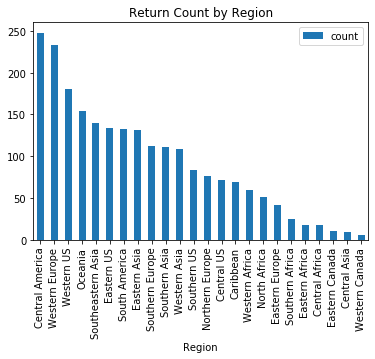

In [233]:
# 3
plt.figure(figsize = (14, 7))
df_return.groupby('Region_y')['Returned'].agg(['count']).sort_values(by = 'count', ascending = False).plot.bar()
plt.title('Return Count by Region')
plt.xlabel('Region')

Text(0.5, 0, 'Sub-category')

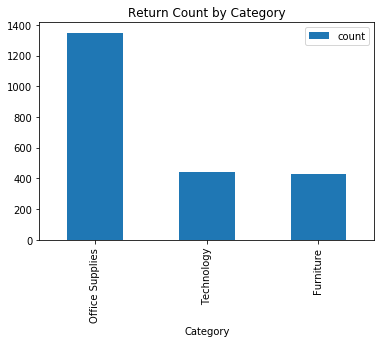

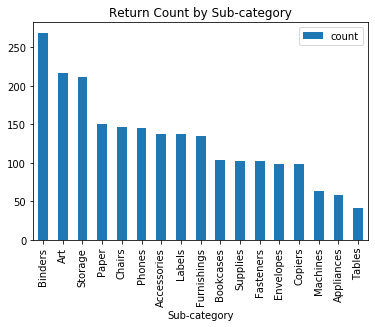

In [239]:
# 4
df_return.groupby('Category')['Returned'].agg(['count']).sort_values(by = 'count', ascending = False).plot.bar()
plt.title('Return Count by Category')
plt.xlabel('Category')


df_return.groupby('Sub.Category')['Returned'].agg(['count']).sort_values(by = 'count', ascending = False).plot.bar()
plt.title('Return Count by Sub-category')
plt.xlabel('Sub-category')